# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import alpaca_trade_api as tradeapi #####Commenting the deprecated way to call the API
from alpaca_trade_api.rest import REST, TimeFrame #Current way to import Alpaca API
from dotenv import load_dotenv 
from MCForecastTools import MCSimulation
from datetime import datetime
%matplotlib inline



debugtoggle = True

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url).json()
response_data_eth = requests.get(eth_url).json()
if (debugtoggle):
    #print(f"{json.dumps(response_data_btc,indent=4)}")
    #print(f"{json.dumps(response_data_eth,indent=4)}")
    print(response_data_btc["data"]["1"]["quotes"]["CAD"]["price"])
    print(response_data_eth["data"]["1027"]["quotes"]["CAD"]["price"])

price_btc = float(response_data_btc["data"]["1"]["quotes"]["CAD"]["price"])
price_eth = float(response_data_eth["data"]["1027"]["quotes"]["CAD"]["price"])

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} in CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} in CAD")

53953.6619
3830.349609
The current value of your 1.2 BTC is $64744.39 in CAD
The current value of your 5.3 ETH is $20300.85 in CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
api_key=os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [9]:
# Format current date as ISO format
start_date = "2022-03-21"
end_date = "2022-03-21"

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api = REST(api_key , api_secret_key, api_version='v2')
stock_and_bond_prices = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
stock_and_bond_prices.index = stock_and_bond_prices.index.date

# Preview DataFrame
if (debugtoggle):
    print(f'{stock_and_bond_prices.head()}')
    #print(f'here {stock_and_bond_prices[["close","symbol"]]}')

              open     high       low   close    volume  trade_count  \
2022-03-21  107.58  107.649  106.9841  107.04   7583668        27316   
2022-03-21  444.45  446.460  440.6800  444.30  85377983       912432   

                  vwap symbol  
2022-03-21  107.310151    AGG  
2022-03-21  443.796432    SPY  


In [10]:
# Pick AGG and SPY close prices
stock_and_bond_prices = stock_and_bond_prices[["close","symbol"]]
#rslt_df = dataframe[dataframe['Percentage'] > 80]
agg_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="AGG"].iloc[0]["close"])
spy_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="SPY"].iloc[0]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,215.00
The current value of your 200 AGG shares is $21,408.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_value = my_spy_value+my_agg_value
crypto_value = my_btc_value+my_eth_value
savings_data = [shares_value, crypto_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns = ['Amount'], index = ['Shares','Crypto']) 


# Display savings DataFrame
display(df_savings)

,Amount
Shares,43623.000000
Crypto,85045.247208


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

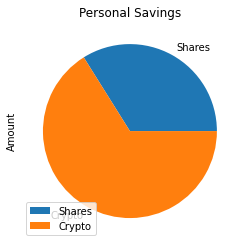

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount',title='Personal Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares_value + crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your savings fund')
elif total_savings == emergency_fund: 
    print('Congratulations! You have reached your financial goal')
else:
    diff_efund == (emergency_fund - total_savings)
    print(f"Keep up the good work... You're ${diff_efund} away from reaching your financial goal")

Congratulations! You have enough money in your savings fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

##### Commenting Deprecated way to pass the start and end dates with the API
#start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

#Updated way to pass the dates with the API
start_date = "2017-03-20"
end_date = "2022-03-20"

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api = REST(api_key , api_secret_key, api_version='v2')
df_stock_data = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
df_stock_data.index=df_stock_data.index.date
df_stock_data=df_stock_data[['close', 'symbol']]

# Display sample data
df_stock_data.head()

,close,symbol
2017-03-20,108.05,AGG
2017-03-21,108.27,AGG
2017-03-22,108.42,AGG
2017-03-23,108.45,AGG
2017-03-24,108.36,AGG


In [42]:
#Manipulating the DF to work with the MCSimulation function
pivottable = pd.pivot_table(df_stock_data, values='close', index=df_stock_data.index, columns=['symbol'])
if (debugtoggle):
    print(f"\n Head \n {pivottable.head()}")
    print(f"\n Columns \n {pivottable.columns}")
ticker_name = list(pivottable.columns)
if (debugtoggle):
    print(f"\n ticker_name \n {ticker_name}")
    #ticker_name = [('AGG','close'),('SPY','close')]

ticker_name = [(x,'close') for x in pivottable.columns]
if (debugtoggle):
    print(f"\n ticker_name \n {ticker_name}")

micolumns = pd.MultiIndex.from_tuples(ticker_name)
if (debugtoggle):
    print(f"\n micolumns \n {micolumns}")

pivottable.columns = micolumns
pivottable


 Head 
 symbol         AGG     SPY
2017-03-20  108.05  236.77
2017-03-21  108.27  233.73
2017-03-22  108.42  234.28
2017-03-23  108.45  234.03
2017-03-24  108.36  233.86

 Columns 
 Index(['AGG', 'SPY'], dtype='object', name='symbol')

 ticker_name 
 ['AGG', 'SPY']

 ticker_name 
 [('AGG', 'close'), ('SPY', 'close')]

 micolumns 
 MultiIndex([('AGG', 'close'),
            ('SPY', 'close')],
           )


,AGG,SPY
,close,close
2017-03-20,108.05,236.77
2017-03-21,108.27,233.73
2017-03-22,108.42,234.28
2017-03-23,108.45,234.03
2017-03-24,108.36,233.86
...,...,...
2022-03-14,107.36,417.00
2022-03-15,107.60,426.17
2022-03-16,107.68,435.55


In [47]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = pivottable,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
print(MC_fiveyear.portfolio_data.head())
MC_fiveyear.calc_cumulative_return()

               AGG                  SPY             
             close daily_return   close daily_return
2017-03-20  108.05          NaN  236.77          NaN
2017-03-21  108.27     0.002036  233.73    -0.012839
2017-03-22  108.42     0.001385  234.28     0.002353
2017-03-23  108.45     0.000277  234.03    -0.001067
2017-03-24  108.36    -0.000830  233.86    -0.000726
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/satishsurath/Developer/Financial-Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997849,1.001894,0.995923,1.007707,1.002222,0.997937,0.990191,0.996188,0.999513,1.005313,...,1.005796,1.006247,1.002682,0.991839,1.002603,0.993006,1.002815,0.994516,0.999587,1.001927
2,1.001364,0.993514,0.987262,1.010203,0.998462,0.988366,0.987442,1.000369,0.993414,1.008507,...,0.998059,1.005905,1.001554,0.989235,1.003798,0.996365,1.007461,0.996957,1.000235,1.002986
3,0.992018,0.982826,0.989601,1.008592,1.008033,0.997106,0.989543,0.997111,0.998951,1.007730,...,1.006946,1.007774,0.992466,0.989320,0.997143,0.999473,1.005811,0.992922,1.002877,0.993737
4,0.998026,0.978002,0.989252,1.002286,1.003610,1.000332,0.992623,0.988251,0.994213,1.004057,...,1.010793,1.012864,0.992599,0.991121,1.001910,0.988650,1.005664,0.992369,0.997855,0.996833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.619729,1.536985,1.150573,1.409264,1.489287,1.375873,1.576813,1.359857,1.704931,1.033085,...,1.208153,1.251236,1.195309,1.328874,1.446660,1.531797,2.137159,1.151987,1.322602,1.219451
1257,1.621417,1.536728,1.143152,1.417073,1.478129,1.374105,1.601415,1.358786,1.713476,1.035337,...,1.192252,1.247876,1.207887,1.335670,1.449483,1.524154,2.130117,1.155568,1.330146,1.213563
1258,1.619241,1.531161,1.139315,1.400005,1.459482,1.377079,1.605843,1.372785,1.718725,1.039198,...,1.197296,1.244121,1.204134,1.337927,1.447120,1.536268,2.117407,1.166323,1.338262,1.221645
1259,1.609509,1.527379,1.140357,1.392930,1.462089,1.387172,1.599633,1.378647,1.717456,1.036835,...,1.192439,1.252954,1.204898,1.338747,1.453585,1.537559,2.108689,1.158981,1.342096,1.228701


In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009035,1.019800,1.007274,0.993537,0.999989,1.006793,0.987234,0.991026,0.999287,0.989965,...,1.008802,0.990631,0.998367,0.996306,1.005638,0.999298,1.003740,0.995918,0.997987,0.987705
2,1.015749,1.016643,1.021442,0.987915,1.000572,1.007587,0.989688,0.995665,1.004104,0.985250,...,1.010723,0.982956,0.998577,0.981389,1.018035,1.000601,1.002730,0.980490,1.011566,0.984374
3,0.991994,1.011483,1.030600,0.997095,0.997604,1.005709,0.994743,0.997920,0.994627,0.997900,...,1.012315,0.989154,0.981850,0.971472,1.006515,1.002006,1.004207,0.984857,1.011721,0.987595
4,0.987360,1.008866,1.034499,1.000035,0.996255,1.003667,0.994341,0.979276,0.999065,0.996478,...,1.016074,0.968970,0.987125,0.972621,1.010508,1.005873,1.004374,0.987862,1.008460,1.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.161399,13.710953,7.014478,13.250531,17.253323,6.504709,17.273753,8.488013,10.957276,13.189109,...,8.223420,12.288181,12.515016,19.375254,10.173651,22.237832,29.862674,5.580458,13.105158,4.897044
7557,15.177512,13.738440,7.043751,13.102212,17.417942,6.477584,17.095762,8.496915,10.990621,12.939785,...,8.340971,12.323093,12.494097,19.483966,10.183564,22.458175,30.326832,5.621498,12.995128,4.964084
7558,15.330981,13.708830,7.038211,13.151718,17.470599,6.487290,16.977758,8.420851,10.888101,13.032973,...,8.363106,12.358473,12.505053,19.621043,10.328272,22.774489,30.055585,5.658289,13.078240,4.966424
7559,15.247704,13.672925,7.101012,13.252124,17.570481,6.403013,17.077302,8.521628,10.773828,12.927884,...,8.216022,12.349652,12.489294,19.596308,10.443810,22.852504,30.026844,5.669949,13.204933,4.931674


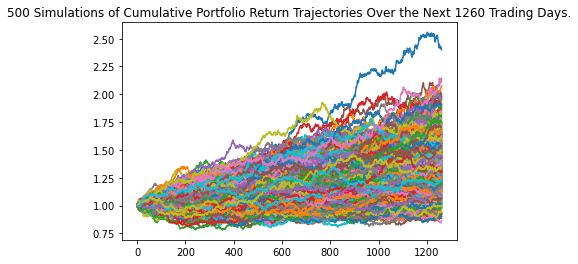

In [48]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

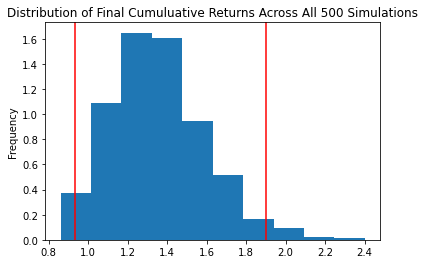

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.351173
std               0.237785
min               0.860467
25%               1.188061
50%               1.329529
75%               1.494501
max               2.401246
95% CI Lower      0.935716
95% CI Upper      1.901239
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


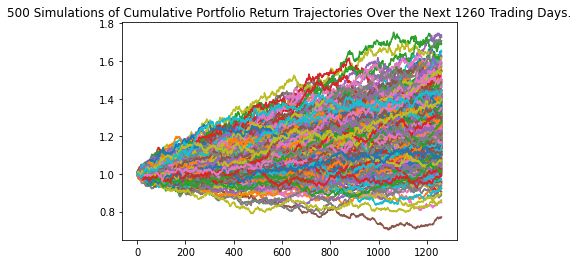

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

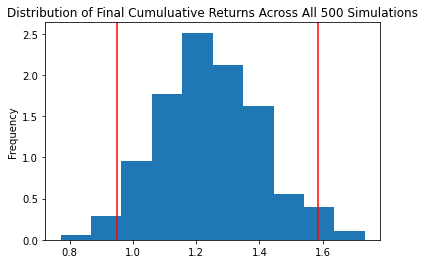

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


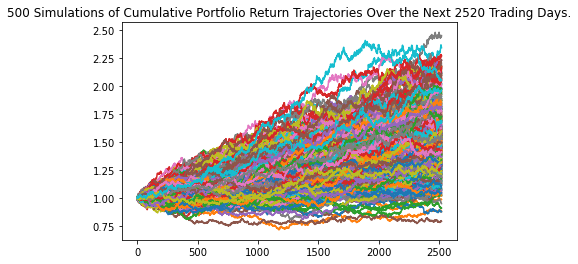

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

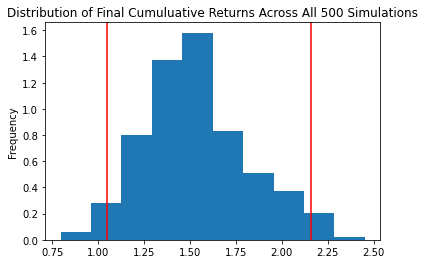

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
